In [11]:
from sklearn.model_selection import train_test_split
from physionet2023.dataProcessing.patientDatasets import MetadataOnlyDataset
import pandas as pd
import seaborn as sns

In [12]:
ds = MetadataOnlyDataset(root_folder="../data")
ds

In [31]:
train_pids_s1, valid_pids_s1 = train_test_split(ds.patient_ids, test_size=0.1, random_state=1)
train_pids_s42, valid_pids_s42 = train_test_split(ds.patient_ids, test_size=0.1, random_state=42)

assert len(train_pids_s1) == len(train_pids_s42)
assert len(valid_pids_s1) == len(valid_pids_s42)

train_metadata_1 = pd.DataFrame([pm for pid, pm, rm in ds if pid in train_pids_s1])
valid_metadata_1 = pd.DataFrame([pm for pid, pm, rm in ds if pid in valid_pids_s1])
train_metadata_42 = pd.DataFrame([pm for pid, pm, rm in ds if pid in train_pids_s42])
valid_metadata_42 = pd.DataFrame([pm for pid, pm, rm in ds if pid in valid_pids_s42])

train_metadata_1['seed'] = 1
valid_metadata_1['seed'] = 1

train_metadata_42['seed'] = 42
valid_metadata_42['seed'] = 42

train_dfs = pd.concat([train_metadata_1, train_metadata_42])
valid_dfs = pd.concat([valid_metadata_1, valid_metadata_42])

train_dfs[['Age', 'CPC', 'ROSC', 'TTM']] = train_dfs[['Age', 'CPC', 'ROSC', 'TTM']].astype('float')
train_dfs['OHCA'] = train_dfs['OHCA'].astype('bool')
valid_dfs[['Age', 'CPC', 'ROSC', 'TTM']] = valid_dfs[['Age', 'CPC', 'ROSC', 'TTM']].astype('float')
valid_dfs['OHCA'] = valid_dfs['OHCA'].astype('bool')

train_dfs['split'] = 'train'
valid_dfs['split'] = 'valid'

all_dfs = pd.concat([train_dfs, valid_dfs])

<Axes: xlabel='seed,split'>

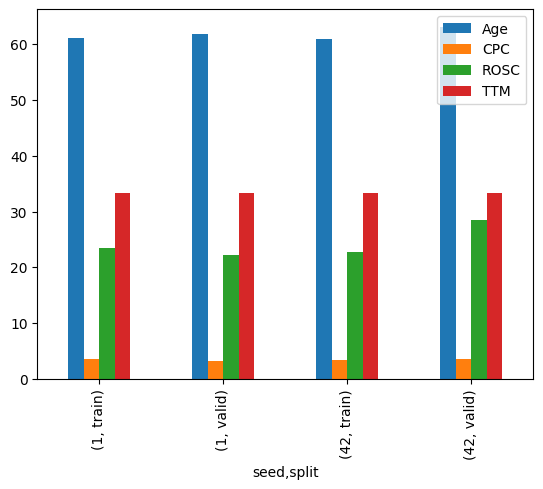

In [33]:
all_dfs[['seed', 'split', 'Age', 'CPC', 'ROSC', 'TTM']].groupby(["seed", 'split']).agg('mean').plot.bar()

In [35]:
means = all_dfs[['seed', 'split', 'Age', 'CPC', 'ROSC', 'TTM']].groupby(["seed", 'split']).agg('mean')
means

Age       CPC       ROSC        TTM
seed split                                           
1    train  61.018657  3.525140  23.388679  33.374165
     valid  61.866667  3.316667  22.133333  33.294118
42   train  60.889925  3.487896  22.722846  33.365854
     valid  63.016667  3.650000  28.392857  33.367347

<Axes: xlabel='split', ylabel='CPC'>

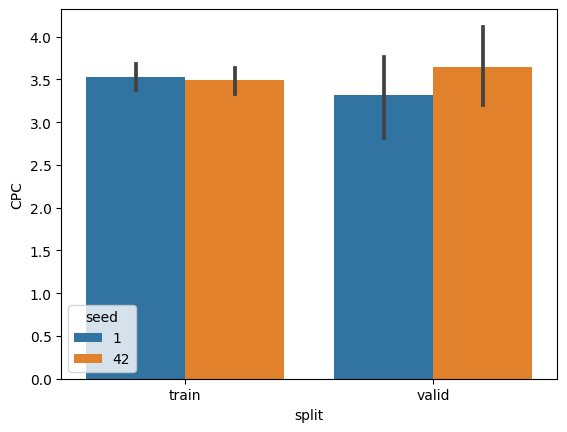

In [38]:
sns.barplot(data=all_dfs, x='split', hue='seed',  y='CPC')